## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Car_prices_prediction.csv', index_col = False)
df.tail()

,Unnamed: 0,Unnamed: 0.1,Brand,Engine (in cc),Number of owner,Insurance,Manufacturing year,Driven kilometers,Fuel type,Mileage,Price (in lakhs)
5506,2900,2900,Maruti,1248.0,First Owner,NaN,2015.0,57000.0,Diesel,26.21,6.25
5507,2901,2901,Maruti,993.0,Second Owner,NaN,NaN,50000.0,Petrol,17.30,70000.00
5508,2902,2902,Maruti,1197.0,First Owner,NaN,2019.0,3972.0,Petrol,21.01,8.00
5509,2903,2903,Maruti,1197.0,First Owner,NaN,2019.0,6441.0,Petrol,19.56,8.40
5510,2904,2904,Tata,1199.0,First Owner,NaN,2020.0,12524.0,Petrol,23.84,7.30


## Dropping unrelevant columns

In [3]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [4]:
df.shape

(5511, 9)

## Checking the data types of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               4867 non-null   object 
 1   Engine (in cc)      4925 non-null   float64
 2   Number of owner     4887 non-null   object 
 3   Insurance           2611 non-null   object 
 4   Manufacturing year  3633 non-null   float64
 5   Driven kilometers   4131 non-null   float64
 6   Fuel type           4838 non-null   object 
 7   Mileage             4804 non-null   float64
 8   Price (in lakhs)    4786 non-null   float64
dtypes: float64(5), object(4)
memory usage: 387.6+ KB


In [6]:
df.describe()

,Engine (in cc),Manufacturing year,Driven kilometers,Mileage,Price (in lakhs)
count,4925.000000,3633.000000,4131.000000,4804.000000,4786.00000
mean,1549.395472,2015.732177,53440.160736,63.829407,719.01099
std,591.536488,3.394995,33658.759773,303.166589,7170.69288
min,0.000000,2003.000000,111.000000,0.000000,1.00000
25%,1197.000000,2013.000000,29698.000000,15.800000,4.45000
50%,1462.000000,2016.000000,50000.000000,17.900000,7.10500
75%,1956.000000,2018.000000,72000.000000,20.510000,13.00000
max,5998.000000,2022.000000,575000.000000,3982.000000,99000.00000


## Checking the number of null values for each column

In [7]:
df.isna().sum()

Brand                  644
Engine (in cc)         586
Number of owner        624
Insurance             2900
Manufacturing year    1878
Driven kilometers     1380
Fuel type              673
Mileage                707
Price (in lakhs)       725
dtype: int64

#### Since i am collecting the data, i have a pre-acquired knowledge that there are rows which are null for all the columns. So, i know that i can safely remove them.

In [8]:
df.head(15)

,Brand,Engine (in cc),Number of owner,Insurance,Manufacturing year,Driven kilometers,Fuel type,Mileage,Price (in lakhs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
n = 14
data = df.iloc[n:,:]
data.reset_index(inplace = True)

In [10]:
data.iloc[6:84]

,index,Brand,Engine (in cc),Number of owner,Insurance,Manufacturing year,Driven kilometers,Fuel type,Mileage,Price (in lakhs)
6,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
79,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data = data.drop(data.index[6:84])
data.reset_index(inplace = True)

In [12]:
data.head()

,level_0,index,Brand,Engine (in cc),Number of owner,Insurance,Manufacturing year,Driven kilometers,Fuel type,Mileage,Price (in lakhs)
0,0,14,Mercedes-Benz,NaN,First Owner,Active,2016.0,16000.0,Petrol,3982.00,1.61
1,1,15,Mercedes-Benz,NaN,First Owner,Active,2021.0,4000.0,Diesel,2925.00,1.33
2,2,16,Mercedes-Benz,4663.0,First Owner,Active,2017.0,5500.0,Petrol,7.81,1.42
3,3,17,Mercedes-Benz,NaN,First Owner,Active,2020.0,8000.0,Petrol,3982.00,2.71
4,4,18,Porsche,1984.0,First Owner,Active,2017.0,25000.0,Petrol,13.60,58.00


In [13]:
data = data.drop(columns = ['level_0','index'], axis = 1)

In [14]:
data.head()

,Brand,Engine (in cc),Number of owner,Insurance,Manufacturing year,Driven kilometers,Fuel type,Mileage,Price (in lakhs)
0,Mercedes-Benz,NaN,First Owner,Active,2016.0,16000.0,Petrol,3982.00,1.61
1,Mercedes-Benz,NaN,First Owner,Active,2021.0,4000.0,Diesel,2925.00,1.33
2,Mercedes-Benz,4663.0,First Owner,Active,2017.0,5500.0,Petrol,7.81,1.42
3,Mercedes-Benz,NaN,First Owner,Active,2020.0,8000.0,Petrol,3982.00,2.71
4,Porsche,1984.0,First Owner,Active,2017.0,25000.0,Petrol,13.60,58.00


## Filling null values

In [15]:
data['Brand'] = data['Brand'].fillna(data['Brand'].mode()[0])
data['Engine (in cc)'] = data['Engine (in cc)'].fillna(data['Engine (in cc)'].mode()[0])
data['Number of owner'] = data['Number of owner'].fillna(data['Number of owner'].mode()[0])
data['Insurance'] = data['Insurance'].fillna(data['Insurance'].mode()[0])
data['Manufacturing year'] = data['Manufacturing year'].fillna(data['Manufacturing year'].mode()[0])
data['Driven kilometers'] = data['Driven kilometers'].fillna(data['Driven kilometers'].mean())
data['Fuel type'] = data['Fuel type'].fillna(data['Fuel type'].mode()[0])
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].mean())

In [16]:
data.isna().sum()

Brand                   0
Engine (in cc)          0
Number of owner         0
Insurance               0
Manufacturing year      0
Driven kilometers       0
Fuel type               0
Mileage                 0
Price (in lakhs)      633
dtype: int64

## We can't just fill null values for the target variable. Instead, let's just drop them.

In [17]:
data = data.dropna()

In [18]:
data.isna().sum().sum()

0

In [19]:
data.shape

(4786, 9)

In [20]:
data.rename(columns = {'Engine (in cc)':'Engine','Number of owner':'No_of_owner','Manufacturing year':'Year',
                      'Driven kilometers':'Kilo_driven','Fuel type':'Fuel_type','Price (in lakhs)':'Price'}, inplace = True)

# EDA
### 1. For categorical data

The value counts for Brand is

Maruti           989
Hyundai          860
Honda            617
Toyota           310
Mahindra         246
Mercedes-Benz    223
BMW              197
Tata             177
Volkswagen       164
Renault          148
Ford             139
Skoda            138
Audi             102
Kia               89
Jeep              72
MG                69
Chevrolet         37
Nissan            37
Land              36
Jaguar            30
Volvo             23
Datsun            22
Fiat              21
Mini              13
Mitsubishi        13
Porsche           11
Isuzu              2
Bentley            1
Name: Brand, dtype: int64 



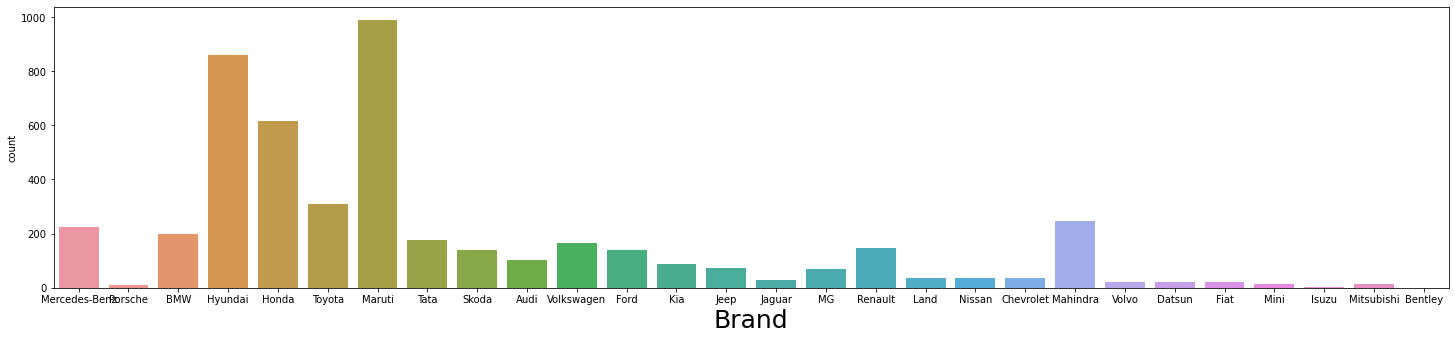

The value counts for No_of_owner is

First Owner               3570
Second Owner              1027
Third Owner                156
Fourth Owner                29
Fifth Owner                  3
Unregistered Car Owner       1
Name: No_of_owner, dtype: int64 



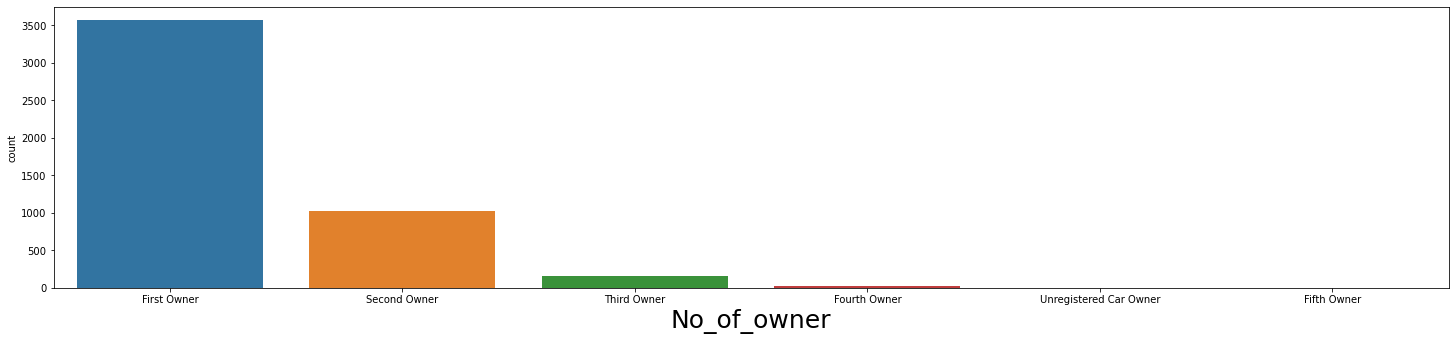

The value counts for Insurance is

Active          4032
No Insurance     754
Name: Insurance, dtype: int64 



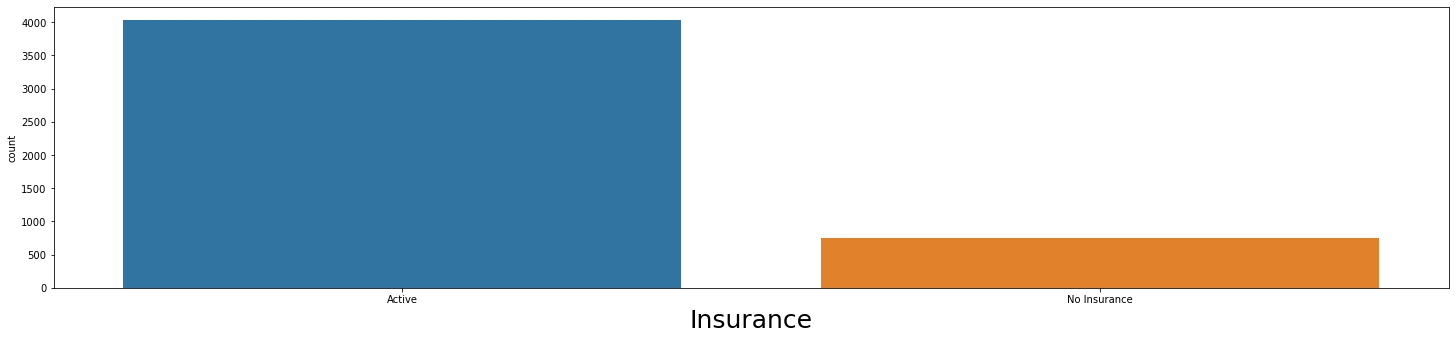

The value counts for Year is

2017.0    1641
2018.0     433
2016.0     356
2015.0     339
2019.0     325
2014.0     286
2020.0     258
2013.0     254
2012.0     240
2021.0     184
2011.0     155
2010.0     118
2009.0      65
2008.0      54
2022.0      38
2007.0      25
2006.0       8
2005.0       5
2003.0       1
2004.0       1
Name: Year, dtype: int64 



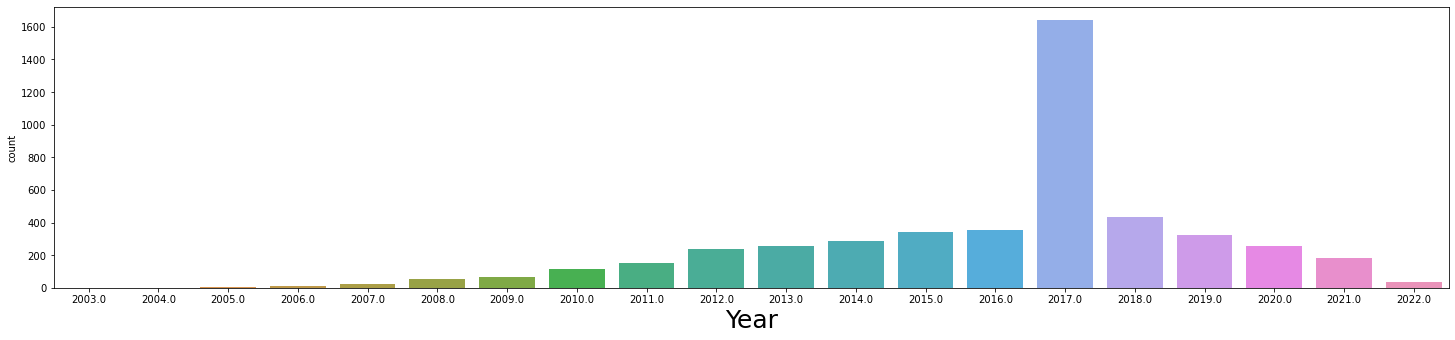

The value counts for Fuel_type is

Petrol      2912
Diesel      1722
CNG          136
Electric      14
LPG            2
Name: Fuel_type, dtype: int64 



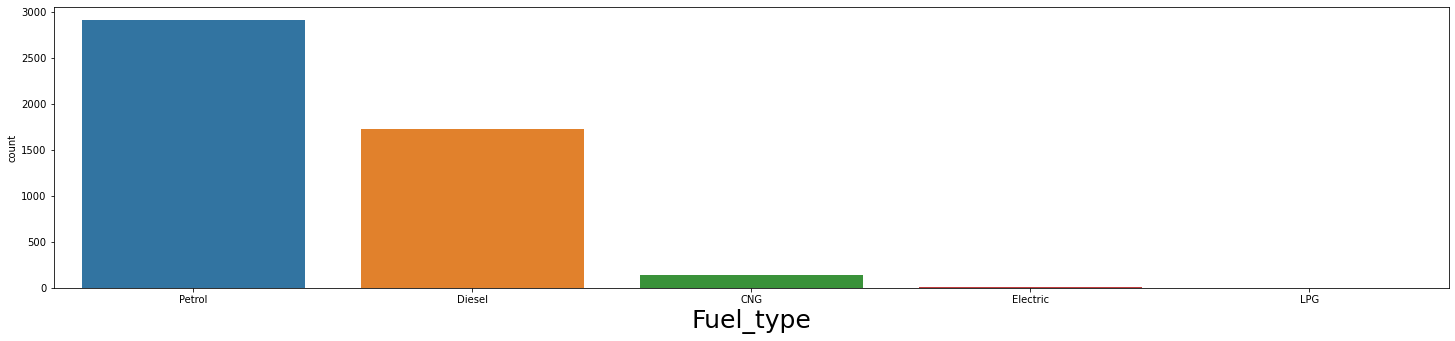

In [21]:
data_cat = data[['Brand', 'No_of_owner', 'Insurance', 'Year', 'Fuel_type']]

plotnumber = 1

for column in data_cat :
    plt.figure(figsize = (25,30))
    if plotnumber <=5:
        ax = plt.subplot(5,1,plotnumber)
        sns.countplot(data_cat[column])
        plt.xlabel(column,fontsize = 25)
        print(f"The value counts for {column} is\n")
        print(data_cat[column].value_counts(),'\n')
        plt.show()
    plotnumber +=1

### 2. For continuous data

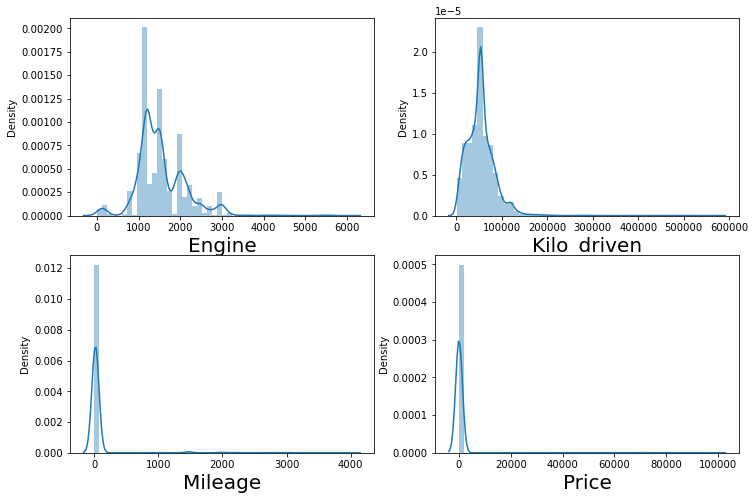

In [22]:
data_cont = ['Engine', 'Kilo_driven', 'Mileage', 'Price']

plt.figure(figsize = (12,8))
plotnumber = 1

for column in data[data_cont] :
    if plotnumber <=4 :
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data[data_cont][column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

## Encoding the data

In [23]:
x = data.drop('Price',axis = 1)

In [24]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

for i in x.columns:
    if data[i].dtypes == 'object':
        data[i] = oe.fit_transform(data[i].values.reshape(-1,1))

In [25]:
data.head()

,Brand,Engine,No_of_owner,Insurance,Year,Kilo_driven,Fuel_type,Mileage,Price
0,17.0,1197.0,1.0,0.0,2016.0,16000.0,4.0,3982.00,1.61
1,17.0,1197.0,1.0,0.0,2021.0,4000.0,1.0,2925.00,1.33
2,17.0,4663.0,1.0,0.0,2017.0,5500.0,4.0,7.81,1.42
3,17.0,1197.0,1.0,0.0,2020.0,8000.0,4.0,3982.00,2.71
4,21.0,1984.0,1.0,0.0,2017.0,25000.0,4.0,13.60,58.00


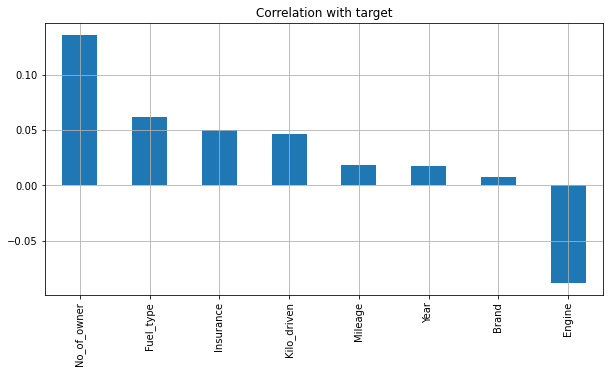

In [26]:
corr = data.drop('Price', axis = 1).corrwith(data['Price']).sort_values(ascending = False)

corr.plot(kind = 'bar', grid = True, figsize = (10,5),
          title = "Correlation with target")
plt.show()

In [27]:
# checking skewness

data.skew()

Brand           0.161317
Engine          1.145749
No_of_owner     1.290657
Insurance       1.880612
Year           -0.807026
Kilo_driven     2.721274
Fuel_type      -0.491542
Mileage         7.218255
Price          10.510227
dtype: float64

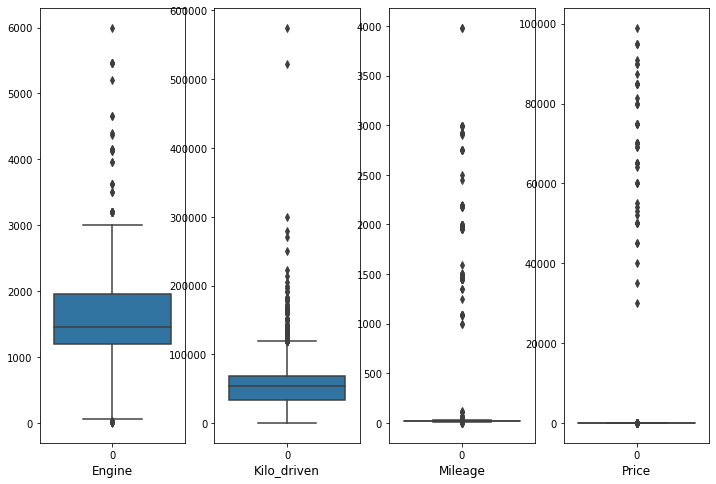

In [28]:
# Visualize the outliers using boxplot
plt.figure(figsize = (12,8))
graph = 1

for column in data[data_cont]:
    if graph <= 4:
        ax = plt.subplot(1,4,graph)
        sns.boxplot(data=data[data_cont][column])
        
        plt.xlabel(column,fontsize = 12)
    graph +=1
plt.show()

In [29]:
# Find the IQR to identify the outliers

# 1st quantile
q1 = data.quantile(0.25)

# 3rd quantile
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1
iqr

Brand              9.00
Engine           759.00
No_of_owner        1.00
Insurance          0.00
Year               4.00
Kilo_driven    34400.00
Fuel_type          3.00
Mileage            4.71
Price              8.55
dtype: float64

In [30]:
engine_high = q3.Engine + (1.5*iqr.Engine)
index = np.where(data['Engine']>engine_high)
data = data.drop(data.index[index])

In [31]:
Kilo_high = q3.Kilo_driven + (1.5*iqr.Kilo_driven)
index = np.where(data['Kilo_driven']>Kilo_high)
data = data.drop(data.index[index])

In [32]:
mileage_high = q3.Mileage + (1.5*iqr.Mileage)
index = np.where(data['Mileage']>mileage_high)
data = data.drop(data.index[index])

In [33]:
price_high = q3.Price + (1.5*iqr.Price)
index = np.where(data['Price']>price_high)
data = data.drop(data.index[index])

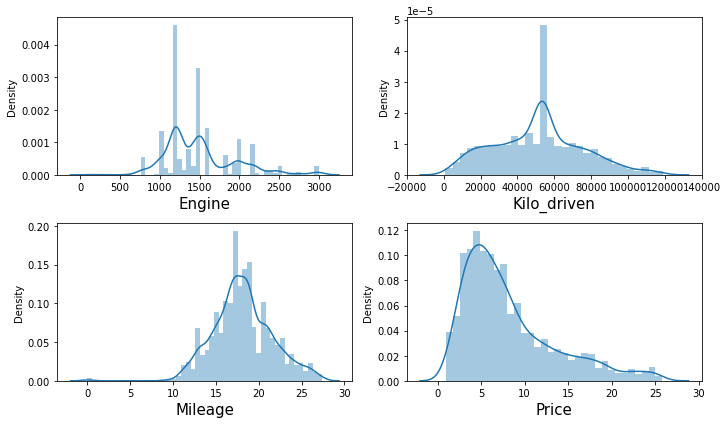

In [34]:
data_cont = ['Engine', 'Kilo_driven', 'Mileage', 'Price']

plt.figure(figsize = (10,6))
plotnumber = 1

for column in data[data_cont] :
    if plotnumber <=4 :
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data[data_cont][column])
        plt.xlabel(column,fontsize = 15)
    plotnumber +=1
plt.tight_layout()

In [35]:
data.skew()

Brand          0.275861
Engine         1.066094
No_of_owner    1.309527
Insurance      1.905156
Year          -0.765750
Kilo_driven    0.215339
Fuel_type     -0.752882
Mileage        0.016684
Price          1.219845
dtype: float64

In [36]:
data_skew = ['Engine','Year','Price']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[data_skew] = scaler.fit_transform(data[data_skew].values)
data.skew()

Brand          0.275861
Engine         0.073084
No_of_owner    1.309527
Insurance      1.905156
Year          -0.579891
Kilo_driven    0.215339
Fuel_type     -0.752882
Mileage        0.016684
Price          0.008072
dtype: float64

In [37]:
x = data.drop('Price', axis = 1)
y = data['Price']

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import sys
from sklearn import metrics
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [39]:
lr = LinearRegression()
xgb = xgb.XGBRegressor()
svr = SVR()

In [40]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [41]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    xgb.fit(x_train,y_train)
    y_train_pred = xgb.predict(x_train)
    y_test_pred = xgb.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {r2_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9744230517952034
At random state 0, the testing accuracy is : 0.8300202555506508

At random state 1, the training accuracy is : 0.9735487980063758
At random state 1, the testing accuracy is : 0.8648270850261377

At random state 2, the training accuracy is : 0.9712621303438437
At random state 2, the testing accuracy is : 0.8339276534715585

At random state 3, the training accuracy is : 0.9731444710172994
At random state 3, the testing accuracy is : 0.8315720948125362

At random state 4, the training accuracy is : 0.9719209484118354
At random state 4, the testing accuracy is : 0.8335642421648768

At random state 5, the training accuracy is : 0.9758493140779758
At random state 5, the testing accuracy is : 0.8568246780700577

At random state 6, the training accuracy is : 0.9744869494051648
At random state 6, the testing accuracy is : 0.8458246819479506

At random state 7, the training accuracy is : 0.9730021281237595
At random state 7, the te

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 13)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [43]:
y_test_pred = xgb.predict(x_test)
print(f"The accuracy score is {r2_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 87.83 %


## Cross Validation

In [44]:
test_acc = r2_score(y_test,y_test_pred)

for i in range (2,15):
    cv_score = cross_val_score(xgb,x_scaled,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean*100:.4f} and accuracy for testing = {test_acc*100:.4f}\n")

At cv = 2,cv_score = 73.3264 and accuracy for testing = 87.8267

At cv = 3,cv_score = 79.9254 and accuracy for testing = 87.8267

At cv = 4,cv_score = 78.9013 and accuracy for testing = 87.8267

At cv = 5,cv_score = 79.9138 and accuracy for testing = 87.8267

At cv = 6,cv_score = 81.2306 and accuracy for testing = 87.8267

At cv = 7,cv_score = 81.7630 and accuracy for testing = 87.8267

At cv = 8,cv_score = 82.1168 and accuracy for testing = 87.8267

At cv = 9,cv_score = 81.5586 and accuracy for testing = 87.8267

At cv = 10,cv_score = 81.6145 and accuracy for testing = 87.8267

At cv = 11,cv_score = 82.2031 and accuracy for testing = 87.8267

At cv = 12,cv_score = 82.0887 and accuracy for testing = 87.8267

At cv = 13,cv_score = 81.9663 and accuracy for testing = 87.8267

At cv = 14,cv_score = 82.5877 and accuracy for testing = 87.8267



In [45]:
cv_score = cross_val_score(xgb,x_scaled,y,cv = 14)
cv_mean = cv_score.mean()
cv_mean

0.8258767408560568

# Regularization

## L1 form

In [46]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 
lasscv = LassoCV(alphas = None, max_iter = 2, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=2, normalize=True)

In [47]:
alpha = lasscv.alpha_
alpha

9.134538983374582e-06

In [48]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=9.134538983374582e-06)

In [49]:
lasso_reg.score(x_test,y_test)

0.6261093815046923

## L2 form

In [50]:
# L2 form
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True) #arange = giving range for learning rate
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [51]:
ridgecv.alpha_

0.020999999999999998

In [52]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.020999999999999998)

In [53]:
ridge_model.score(x_test,y_test)

0.6261122046001555

### L1 and L2  are both around 0.6261 and they do not differ much, so our model does not overfit

## Model Evaluation

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
y_pred = xgb.predict(x_test)
mean_absolute_error(y_test,y_pred)

0.25551558858166257

In [56]:
mean_squared_error(y_test,y_pred)

0.1253530620546944

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.35405234366502136

## Saving the model

In [58]:
import pickle
filename = 'car_price_prediction.pickle'

pickle.dump(xgb,open(filename,'wb'))

## Scatter plot between actual and predicted price

Text(0.5, 1.0, 'Predicted vs Actual model')

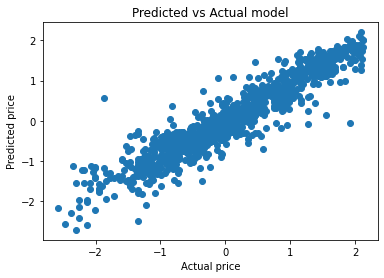

In [59]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs Actual model')